# Лабораторная работа №3

Вариант №10

Выполнил студент группы 15-В-2
Романов М.К.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold, train_test_split)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from scipy.stats import *

df = pd.read_csv(r'airfoil_self_noise.dat.txt', sep='\t')

In [2]:
df.head()

,frequency,attack,chord,velocity,thickness,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

Набор данных NASA содержит аэродинамические профили NACA 0012 различного размера на различных скоростях и углах атаки в аэродинамической трубе.
Пролет аэродинамического профиля и положение наблюдателя были одинаковыми во всех экспериментах.

    frequency - Частота в Герцах
    attack - Угол атаки а градусах
    chord - Длина хорды(провода) в метрах
    velocity - Скорость свободного потока в метрах в секунду
    thickness - Толщина смещения всасывающей стороны в метрах
    sound - Маштабированный уровень звукового давления в дицибелах


# 2. Удалите дубликаты строк в наборе данных;приведите размер набора данных до и после данной операции;

In [3]:
print(df.shape)
print('\n')
df.info()

(1503, 6)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency    1503 non-null int64
attack       1503 non-null float64
chord        1503 non-null float64
velocity     1503 non-null float64
thickness    1503 non-null float64
sound        1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [4]:
df = df.drop_duplicates()
df = df.dropna()
print(df.shape)
print('\n')
df.info()

(1503, 6)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency    1503 non-null int64
attack       1503 non-null float64
chord        1503 non-null float64
velocity     1503 non-null float64
thickness    1503 non-null float64
sound        1503 non-null float64
dtypes: float64(5), int64(1)
memory usage: 82.2 KB


# 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [5]:
numerical = [i for i in df.columns if df[i].dtype.name != 'object']
categorial = [i for i in df.columns if df[i].dtype.name == 'object']

print('Числовые столбцы: ', numerical)
print('\n')
print('Категориальные стобцы: ', categorial)

Числовые столбцы:  ['frequency', 'attack', 'chord', 'velocity', 'thickness', 'sound']


Категориальные стобцы:  []


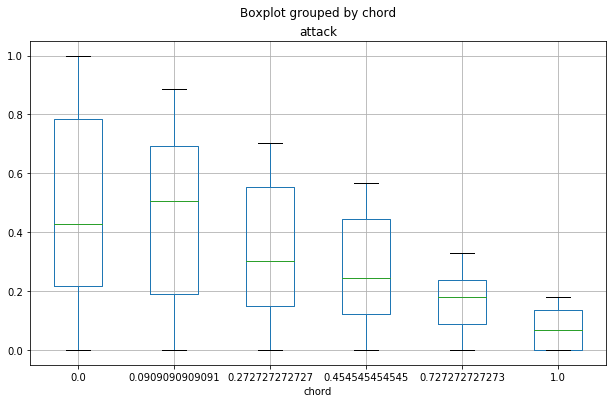

In [14]:
df.boxplot(column='attack', by='chord', figsize=(10,6))
plt.show()

In [8]:
def cast(obj):
    if type(obj) == str:
        return float(obj.replace(',', '.'))
    else:
        return obj

df['velocity'] = df['velocity'].apply(lambda x: cast(x))
df['chord'] = df['chord'].apply(lambda x: cast(x))

numerical = [i for i in df.columns if df[i].dtype.name != 'object']
categorial = [i for i in df.columns if df[i].dtype.name == 'object']

print('Числовые столбцы: ', numerical)
print('\n')
print('Категориальные стобцы: ', categorial)

Числовые столбцы:  ['frequency', 'attack', 'chord', 'velocity', 'thickness', 'sound']


Категориальные стобцы:  []


In [9]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df.tail()

,frequency,attack,chord,velocity,thickness,sound
1498,0.116162,0.702703,0.272727,0.199495,0.904111,0.183051
1499,0.148990,0.702703,0.272727,0.199495,0.904111,0.156194
1500,0.191919,0.702703,0.272727,0.199495,0.904111,0.085729
1501,0.242424,0.702703,0.272727,0.199495,0.904111,0.075624
1502,0.308081,0.702703,0.272727,0.199495,0.904111,0.021911


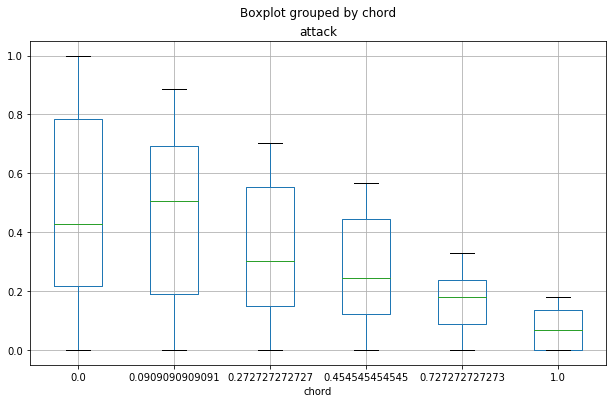

In [13]:
df.boxplot(column='attack', by='chord', figsize=(10,6))
plt.show()

Задание №4 не нуждается в выполнении, так как категориальных признаков нет

# 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

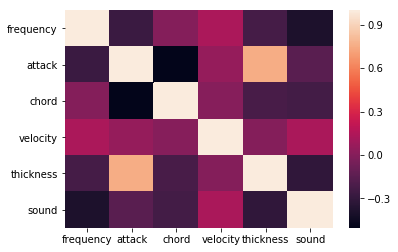

In [16]:
matrix = df.corr()
sns.heatmap(matrix);
plt.show()

In [18]:
matrix

,frequency,attack,chord,velocity,thickness,sound
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
sound,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


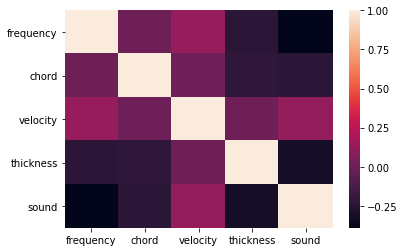

In [19]:
#Угол атаки сильно коррелирует со скоростью и толщиной смещения, удалим его
matrix = df.drop(['attack'], axis=1).corr()
sns.heatmap(matrix);
plt.show()

# 6. Заполните пропущенные значения в данных

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
frequency    1503 non-null float64
attack       1503 non-null float64
chord        1503 non-null float64
velocity     1503 non-null float64
thickness    1503 non-null float64
sound        1503 non-null float64
dtypes: float64(6)
memory usage: 82.2 KB


Задание №6 не нуждается в выполнении, т.к. пропусков нет

# 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value

In [44]:
# линейная регрессия, RIDGE регуляризатор.
X, y = df.drop(['sound' ], axis=1), df['sound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 57)

reg = linear_model.Ridge (alpha = 0.5)
reg.fit (X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
reg.coef_

array([-0.65945744, -0.2311326 , -0.26140898,  0.11271316, -0.2265742 ])

In [46]:
xt = reg.predict(X_test)
print(xt[:10])

[ 0.75981496  0.52589046  0.30678046  0.52375811  0.42384031  0.63059208
  0.32814831  0.59500176  0.65519872  0.70204257]


In [47]:
print(y_test[:10])

1062    0.840163
85      0.643524
719     0.163267
909     0.651820
915     0.391762
1394    0.823251
1498    0.183051
322     0.661685
362     0.755710
517     0.663547
Name: sound, dtype: float64


In [48]:
print(xt[:10]-y_test[:10])

1062   -0.080348
85     -0.117633
719     0.143513
909    -0.128062
915     0.032078
1394   -0.192659
1498    0.145097
322    -0.066684
362    -0.100512
517     0.038496
Name: sound, dtype: float64


In [49]:
reg.intercept_

0.82082525550204899

In [50]:
# линейная регрессия без использования регуляризаторов;
X, y = df.drop(['sound'], axis=1), df['sound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 57)

reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
reg.coef_

array([-0.67552255, -0.2373269 , -0.26522199,  0.11410144, -0.22673814])

In [52]:
reg.intercept_

0.82572385725437636

In [53]:
from scipy.stats import *
corr={}
corr['pearson'], _ = stats.pearsonr(xt,y_test)
corr['spearman'], _ = stats.spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.695630799737
0.670888313446
